# Keypoints Extraction


image 1/1 D:\Projects\FLASK\MM\evaluation\test dataset\example photo.jpg: 448x640 1 cow, 960.8ms
Speed: 7.0ms preprocess, 960.8ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


[]

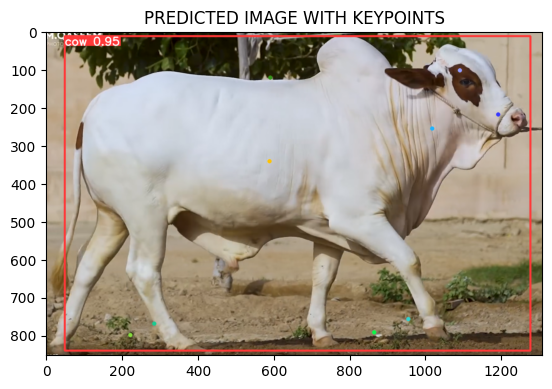

In [8]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

image_path='test dataset/example photo.jpg'

model=YOLO('../static/model/best_pose_model.pt')
results=model(source=image_path, conf=0.75, save=False)

predicted_image=results[0].plot()
rgb_predicted = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGBA)

plt.title('PREDICTED IMAGE WITH KEYPOINTS')
plt.imshow(rgb_predicted)
plt.plot()

We have 12 keypoints in a cow
    
    1.Nose
    2. Right Eye
    3. Left Eye
    4. Side Neck
    5. Left Front Hoof
    6. Right Front Hoof
    7. Left Back Hoof
    8. Right Back Hoof
    9. Backbone (side)
    10. Tail Root
    11. Back Pose Middle
    12. Center Point
    
 and all of these have some x,y,z coordinates in an image. 
 Note: If a part or keypoint is not visible then it's x,y,z coordinates will be 0.0 

In [9]:
predicted_keypoints=[]

kptss = results[0].keypoints.data
for kpts in kptss:
    for kpt in kpts:
        predicted_keypoints.append(kpt)


list_of_dicts = [{"x": kpt[0].item(), "y": kpt[1].item(), "z": kpt[2].item()} for kpt in predicted_keypoints]

for d in list_of_dicts:
    if d['x'] == 0.0 and d['y'] == 0.0:   # If x,y is 0 which means the object is not present in the photo therefore, z=0
        d['z'] = 0.0


In [10]:
list_of_dicts

[{'x': 1192.1397705078125, 'y': 219.2502899169922, 'z': 0.9008038640022278},
 {'x': 1091.7398681640625, 'y': 103.9752197265625, 'z': 0.9571262001991272},
 {'x': 0.0, 'y': 0.0, 'z': 0.0},
 {'x': 1018.2180786132812, 'y': 256.15545654296875, 'z': 0.982089638710022},
 {'x': 955.9326171875, 'y': 757.5151977539062, 'z': 0.8283687829971313},
 {'x': 865.4307861328125, 'y': 792.8687744140625, 'z': 0.9652423858642578},
 {'x': 285.70672607421875, 'y': 769.543212890625, 'z': 0.8199923038482666},
 {'x': 222.27149963378906, 'y': 799.5029296875, 'z': 0.9017370343208313},
 {'x': 591.5242309570312, 'y': 122.63095092773438, 'z': 0.7727588415145874},
 {'x': 0.0, 'y': 0.0, 'z': 0.0},
 {'x': 0.0, 'y': 0.0, 'z': 0.0},
 {'x': 589.1141357421875, 'y': 342.1628112792969, 'z': 0.9941633343696594}]

# BULK IMAGES TEST 

In [1]:
import os

folder_path = "test dataset/"

files = os.listdir(folder_path)

file_names = [] 

for file_name in files: 
    if os.path.isfile(os.path.join(folder_path, file_name)):
        file_names.append(file_name)

print(file_names)


['.picasa.ini', 'buffalo.jpg', 'cat.jpg', 'cow1.jpg', 'cow10.jpg', 'cow11.jpg', 'cow12.jpg', 'cow13.jpg', 'cow2.jpg', 'cow3.jpg', 'cow4.jpg', 'cow5.jpg', 'cow6.jpg', 'cow7.jpg', 'cow8.jpg', 'cow9.jpg', 'dog.jpg', 'donkey.jpg', 'donkey2.jpg', 'example photo.jpg', 'example2.jpg', 'example3.jpg', 'example4.jpg', 'example5.jpg', 'example6.jpg', 'goat.jpg', 'horse.jpg', 'horse2.jpeg', 'horse3.jpg', 'horse4.jpg', 'sa1.jpg', 'sa2.jpg', 'sheep.jpg', 'zaid1.jpg', 'zaid2.jpg']


In [2]:
file_names.remove('.picasa.ini')

In [3]:
updated_path=[]

for f in file_names:
    path = os.path.join(folder_path, f)   #folder path is initialized above
    updated_path.append(path)
updated_path   

['test dataset/buffalo.jpg',
 'test dataset/cat.jpg',
 'test dataset/cow1.jpg',
 'test dataset/cow10.jpg',
 'test dataset/cow11.jpg',
 'test dataset/cow12.jpg',
 'test dataset/cow13.jpg',
 'test dataset/cow2.jpg',
 'test dataset/cow3.jpg',
 'test dataset/cow4.jpg',
 'test dataset/cow5.jpg',
 'test dataset/cow6.jpg',
 'test dataset/cow7.jpg',
 'test dataset/cow8.jpg',
 'test dataset/cow9.jpg',
 'test dataset/dog.jpg',
 'test dataset/donkey.jpg',
 'test dataset/donkey2.jpg',
 'test dataset/example photo.jpg',
 'test dataset/example2.jpg',
 'test dataset/example3.jpg',
 'test dataset/example4.jpg',
 'test dataset/example5.jpg',
 'test dataset/example6.jpg',
 'test dataset/goat.jpg',
 'test dataset/horse.jpg',
 'test dataset/horse2.jpeg',
 'test dataset/horse3.jpg',
 'test dataset/horse4.jpg',
 'test dataset/sa1.jpg',
 'test dataset/sa2.jpg',
 'test dataset/sheep.jpg',
 'test dataset/zaid1.jpg',
 'test dataset/zaid2.jpg']

# Combined prediction

In [13]:
import cv2
from ultralytics import YOLO

model=YOLO('../static/model/best_pose_model.pt')
results=model(source=updated_path, conf=0.75, save=True)


0: 640x640 (no detections), 1: 640x640 1 other, 2: 640x640 1 cow, 3: 640x640 1 cow, 4: 640x640 1 cow, 5: 640x640 (no detections), 6: 640x640 1 other, 7: 640x640 1 cow, 8: 640x640 1 cow, 9: 640x640 1 other, 10: 640x640 1 cow, 11: 640x640 1 cow, 12: 640x640 1 cow, 13: 640x640 1 cow, 14: 640x640 (no detections), 15: 640x640 1 other, 16: 640x640 1 other, 17: 640x640 1 other, 18: 640x640 1 cow, 19: 640x640 1 cow, 20: 640x640 1 cow, 21: 640x640 1 cow, 22: 640x640 1 cow, 23: 640x640 1 cow, 24: 640x640 1 other, 25: 640x640 1 other, 26: 640x640 1 other, 27: 640x640 (no detections), 28: 640x640 1 other, 29: 640x640 (no detections), 30: 640x640 1 other, 31: 640x640 (no detections), 32: 640x640 (no detections), 33: 640x640 (no detections), 52759.3ms
Speed: 6.4ms preprocess, 1551.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\pose\predict


# Saved results could be seen from the directory where it is saved